# Exploratory Data Analysis 

This is an ED where we r using the income_census dataset to see which features can increase one's chance of earning >50k. The following steps would be taken;

- Importing the necessary libraries 
- Big picture view of the data 
- Missing values 
- Dependent variable (income)
- Independent variables 
- Other relationships (if necesary)

## 1) Import Libraries

In [2]:
# Importing the necessary libraries

import numpy as np # for calculations 
import pandas as pd # excel 
import matplotlib.pyplot as plt # visuals 
import seaborn as sns # enhanced matplot to enhance visuals 


%matplotlib inline  

In [3]:
# Importing the dataset 

dataset = pd.read_csv('income_census.csv')
dataset


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# 2. Big Picture 

In [4]:
# Big Picture view 

dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
dataset.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
dataset.describe() # just for the numeric variables 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
dataset.info() # int = interger 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
dataset.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [9]:
dataset.shape

(32561, 15)

# 3) Missing values 

In [10]:
dataset = dataset.replace('?',np.NaN) # numpy comes to help replace any missing values with its ayandard NaN 

In [11]:
dataset.isna().any() # reveals the variables which have missing values by indicating true 

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [12]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 4. Dependent Variable 

### Here we would be looking on a general scale what percentage of dataset falls within the income range of <=50k and >50k

<AxesSubplot:xlabel='income'>

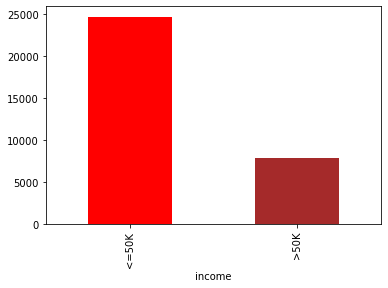

In [13]:
dataset.groupby('income').size().plot(kind ='bar',color =['red','brown'])

<AxesSubplot:xlabel='income', ylabel='count'>

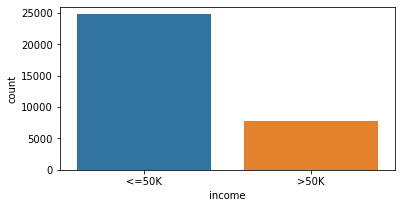

In [14]:
plt.figure(figsize = (6,3)) # we can alternate dis 6 n 3 to change the size 
sns.countplot(x = 'income' ,data = dataset)

### 5.) Independent Variable; we are going to plot each independent variable against our main dependent varaible which is Income 
 

####  5.1) Age 

In [15]:
dataset.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

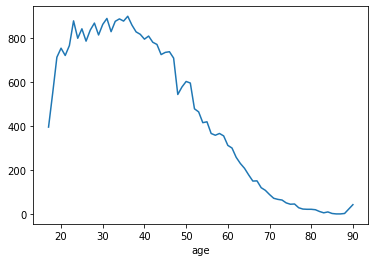

In [16]:
dataset.groupby('age').size().plot()

### 5.2) Hours per week 

<AxesSubplot:xlabel='hours.per.week'>

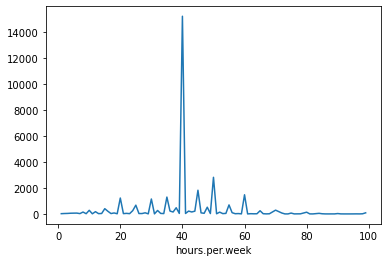

In [17]:
dataset.groupby('hours.per.week').size().plot()

### 5.3) Native Country

<AxesSubplot:xlabel='native.country'>

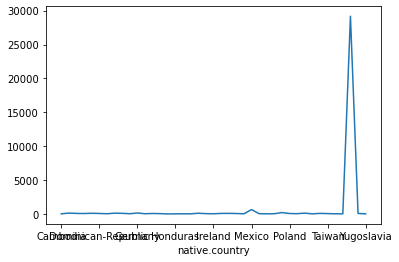

In [18]:
dataset.groupby('native.country').size().plot()

###  Ploting Age against income, to see which age group possibly earns highest 

<AxesSubplot:xlabel='age', ylabel='count'>

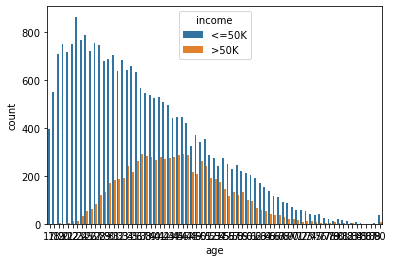

In [20]:
sns.countplot(x = 'age' ,  hue = 'income', data = dataset)

###  Ploting Sex against income, to see which gender  possibly earns highest 

<AxesSubplot:xlabel='sex', ylabel='count'>

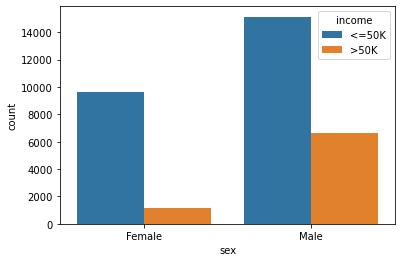

In [21]:
sns.countplot(x = 'sex' ,  hue = 'income', data = dataset)

###  Ploting workclass against income, to know if either blue-collar jobs pay more or other sectors

<AxesSubplot:xlabel='workclass', ylabel='count'>

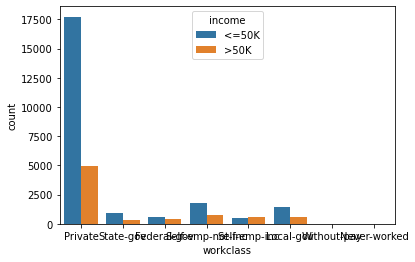

In [22]:
sns.countplot(x = 'workclass' ,  hue = 'income', data = dataset)

###  Ploting education against income, to ascertain if the more educated people are likely to earn more or not 

<AxesSubplot:xlabel='education', ylabel='count'>

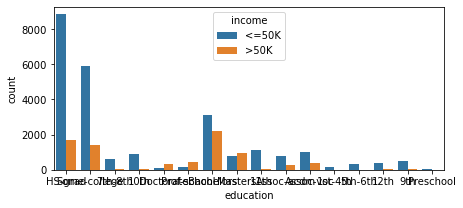

In [23]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'education' ,  hue = 'income', data = dataset)

###  Ploting Marital Status against income, to determine the financial levels for the various social positions and determine which group is most likely to earn above 50k 

<AxesSubplot:xlabel='marital.status', ylabel='count'>

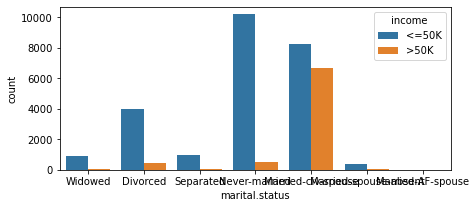

In [24]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'marital.status' ,  hue = 'income', data = dataset)

###  Ploting Race against income, to see which cultures possibly earn highest 

<AxesSubplot:xlabel='race', ylabel='count'>

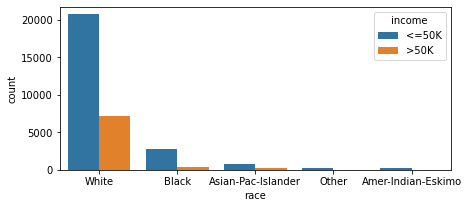

In [74]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'race' ,  hue = 'income', data = dataset)

# 6.) Other Relationships 

## Here we would be analyzing other independent variables to see if there are any exixting relationships, and as such help us make insightful decisions 

###  Ploting Marital status against occupation, to see if more people decide to get a job given and desire to earn more so as to care for their families  

<AxesSubplot:xlabel='marital.status', ylabel='count'>

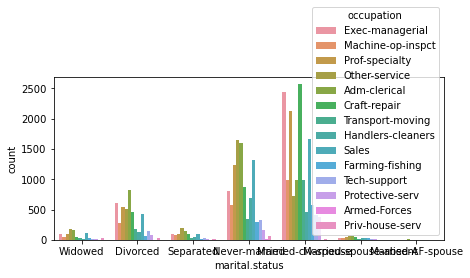

In [25]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'marital.status' ,  hue = 'occupation', data = dataset)

###  Ploting Sex against education, to determine if either males or females decide to purse education to a certain level so as to earn high 

<AxesSubplot:xlabel='sex', ylabel='count'>

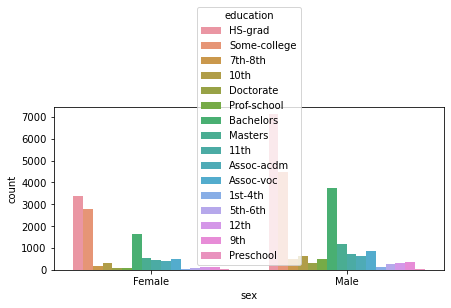

In [26]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'sex' ,  hue = 'education', data = dataset)

###  Ploting Age against hours per week , to see if the younger people are those interested in earning higher and as such put in more hours in their jobs 

In [ ]:
plt.figure(figsize = (7,3))
sns.countplot(x = 'age' ,  hue = 'hours.per.week', data = dataset)